Notebook to compare the continuum surface theory to the discrete surface theory and full-scale numerics.

In [111]:
import weyl_surface as ws
import weyl_green as wg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from ipywidgets import interact
import weyl_spins as spins
import warnings
warnings.filterwarnings(action='ignore')
sns.set_style("white")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The full surface theory, when accounting for tunnelling, yields 5 equations:
\begin{equation}
\begin{aligned}
\alpha+\beta &=\gamma \\
\alpha w_{+}+\beta w_{-} &=\gamma w_{m} \\
\alpha \lambda_{+}+\beta \lambda_{-} &=\gamma \mu+r \gamma \\
\alpha \lambda_{+} w_{+} + \beta \lambda_{-} w_{-} &=\gamma \mu w_{m}+r \gamma w_{m} \\
\int|\psi|^{2} d y &=1
\end{aligned}
\end{equation}

The first 4 can be condensed into a single one:
\begin{equation}
0=\left(w_{m}-w_{-}\right) \lambda_{+} w_{+}-\left(w_{m}-w_{+}\right) \lambda_{-} w_{-}+2(\mu+r)\left(w_{+}-w_{-}\right) w_{m}=F(E)
\end{equation}
with
\begin{equation}
w_{m}=\frac{\lambda_{+} w_{-} - \lambda_{-} w_{+} + 2(\mu + r)(w_{+}-w_{-})}{\lambda_{+}-\lambda_{-}}
\end{equation}
where
\begin{equation}
w_{\pm}=\frac{h_z-\lambda_{\pm}^{2} / 2+E}{g_{1}+\lambda_{\pm}}
\end{equation}
and
\begin{equation}
\lambda_{\pm}^{2}=2 (1 + h_z) \pm 2 \sqrt{1 + 2 h_z + E^{2}-g_{1}^{2}}.
\end{equation}

In [2]:
size = 100
res = 100
kz = np.pi/2
t = 1
g = 0
mu = -8
r = 2.3
krange = 1

# full spectrum
kxs_full, Es_full, locs = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=1,g=g,mu=mu,r=r)

# continuum surface theory
kxs_surf, Es_surf = ws.EnergiesContinuum(krange=krange,kz=kz,g=g,mu=mu,r=r)

# discrete surface theory
branch = -1
p_idx = +1
q_idx = +1
kxs_disc, Es_disc = ws.Energies(branch=branch,p_idx=p_idx,q_idx=q_idx,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r)

# define parameters in discrete model
# def pq_pm(qp,pm,kx,kz,t,g,mu):
#     g0 = -2 * t * (np.cos(kx) + np.cos(kz)) - mu 
#     g1 = t * np.sin(kx)
#     g3 = t * (2 + g - np.cos(kx) - np.cos(kz))
    
#     # decay parameters
#     if qp == "p":
#         p = (g0 - E) / (2*t) + p_idx * np.sqrt( (g0 - E)**2 / (4 * t**2) - 1)
#         return p
    
#     elif qp == "q":
#         gamma = (g1**2 + g3**2 + t**2 - E**2) / (g3 * t)
#         q = gamma / 2 + pm * np.sqrt( (gamma / 2)**2 - 1)
#         return q

In [66]:
%matplotlib inline

kxs = np.linspace(-np.pi,np.pi,res)

def SpectrumPlot(kz=np.pi/2,r=2.3,continuum=False,discrete=True,branch_pp=True,branch_pm=False,branch_mp=False,branch_mm=False):
    # full spectrum
    kxs_full, Es_full, locs = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=1,g=g,mu=mu,r=r)

    # surface theory
    if continuum:
        kxs_surf, Es_surf = ws.EnergiesContinuum(krange=krange,kz=kz,g=g,mu=mu,r=r)
    
    # discrete surface theory
    if discrete:
        kxs_disc_ppp, Es_disc_ppp = ws.Energies(branch=+1,p_idx=+1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
        kxs_disc_ppm, Es_disc_ppm = ws.Energies(branch=+1,p_idx=+1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
        kxs_disc_pmp, Es_disc_pmp = ws.Energies(branch=+1,p_idx=-1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
        kxs_disc_pmm, Es_disc_pmm = ws.Energies(branch=+1,p_idx=-1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
#         kxs_disc_mpp, Es_disc_mpp = ws.Energies(branch=-1,p_idx=+1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
#         kxs_disc_mpm, Es_disc_mpm = ws.Energies(branch=-1,p_idx=+1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
#         kxs_disc_mmp, Es_disc_mmp = ws.Energies(branch=-1,p_idx=-1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
#         kxs_disc_mmm, Es_disc_mmm = ws.Energies(branch=-1,p_idx=-1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)

    # plot
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',alpha=0.2, label="Numerics")
    ax.scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',s=50,label="Interface numerics")
    if continuum:
        ax.scatter(kxs_surf,Es_surf,c='orange',marker="o",s=10,alpha=0.2,label="Continuum")
    if discrete:
        if branch_pp:
            ax.scatter(kxs_disc_ppp,Es_disc_ppp,c="blue",marker="+",s=12,alpha=0.2,label="Discrete +++")
#             plt.scatter(kxs_disc_mpp,Es_disc_mpp,c="blue",marker="+",s=12,alpha=0.2,label="Discrete -++")
        if branch_pm:
            ax.scatter(kxs_disc_ppm,Es_disc_ppm,c="orange",marker="+",s=12,alpha=0.2,label="Discrete ++-")
#             plt.scatter(kxs_disc_mpm,Es_disc_mpm,c="orange",marker="+",s=12,alpha=0.2,label="Discrete -+-")
        if branch_mp:
            ax.scatter(kxs_disc_pmp,Es_disc_pmp,marker="+",s=12,alpha=0.2,label="Discrete +-+")
#             plt.scatter(kxs_disc_mmp,Es_disc_mmp,marker="+",s=12,alpha=0.2,label="Discrete --+")
        if branch_mm:        
            ax.scatter(kxs_disc_pmm,Es_disc_pmm,marker="+",s=12,alpha=0.2,label="Discrete +--")
#             plt.scatter(kxs_disc_mmm,Es_disc_mmm,marker="+",s=12,alpha=0.2,label="Discrete ---")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel(r"$k_x$")
    ax.legend(loc=(1.04,0.8))

    return ax

@interact(kz=(-np.pi,np.pi,0.1),r=(0,3,0.1))
def SpectrumInteract(kz=np.pi/2,r=2.3,continuum=False,discrete=True,branch_pp=True,branch_pm=False,branch_mp=False,branch_mm=False):
    fig = SpectrumPlot(kz,r,continuum,discrete,branch_pp,branch_pm,branch_mp,branch_mm)
#     fig.show()

interactive(children=(FloatSlider(value=1.5707963267948966, description='kz', max=3.141592653589793, min=-3.14…

The theories don't match too well. This is not so troubling for the continuum theory, as the numerics are discrete. The discrete theory is troubling. However, it seems to pinpoint the correct bulk momenta.

Can we match the surface states to the ones predicted by the continuum theory?

<IPython.core.display.Javascript object>


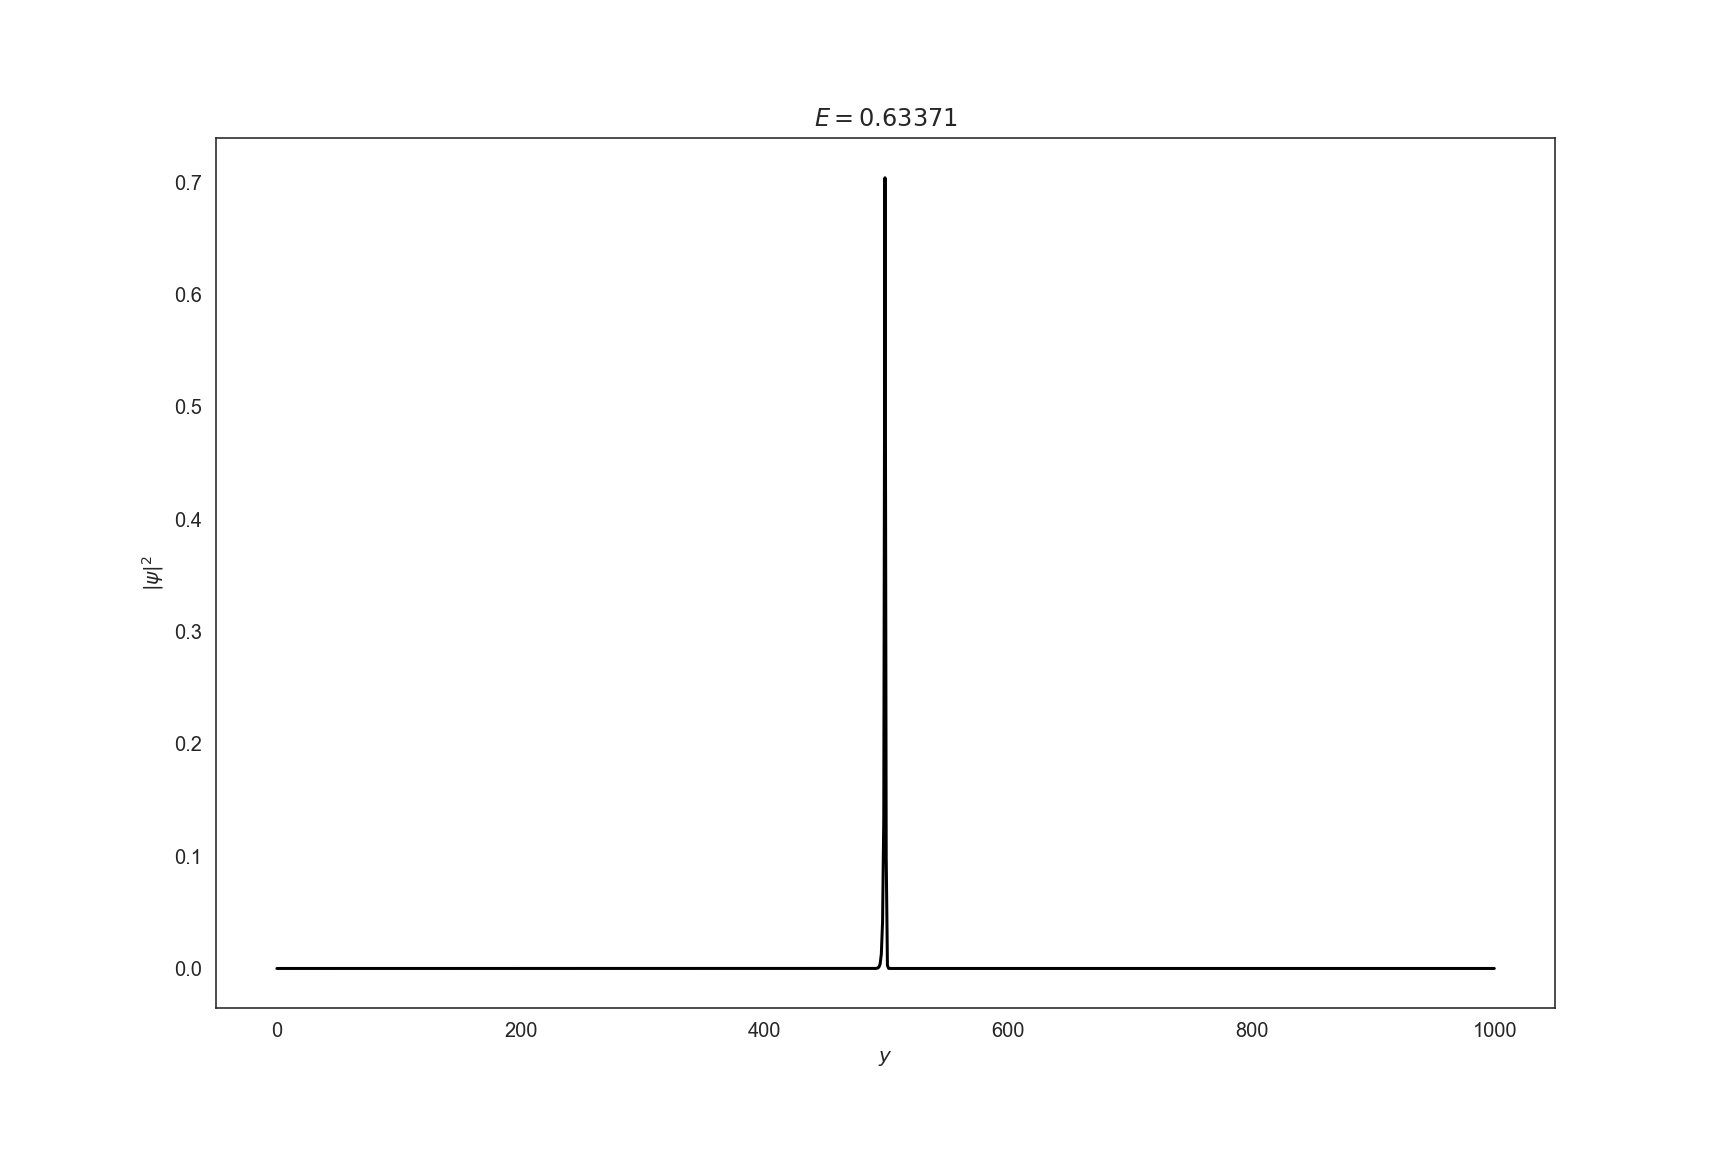

sx = -0.62, sz = 0.78
s**2 = 0.99


In [13]:
# take a known interface state
kx = -1
kz = np.pi / 2
r = 2.3
target = 0. # approximate value of E
t = 1
size = 1000
mu = -8
g = 0

H = wg.FullHamiltonian(size=size,kx=kx,kz=kz,t=t,g=g,mu=mu,r=r)
Es, Ws = np.linalg.eigh(H)
idx = np.argmin(np.abs(Es - target))
state = Ws[:,idx]
prob = np.abs(state)**2
wvfct = [np.sum(prob[i:i+2]) for i in range(0, np.size(prob), 2)]

# plot it
plt.figure()
plt.title("$E={:.5}$".format(Es[idx]))
plt.plot(np.arange(size),wvfct,c='k')
plt.ylabel("$|\psi|^2$")
plt.xlabel("$y$")
plt.show()

# print spins values
sx,sy,sz=spins.Spin(state,size)
print("sx = {:.2}, sz = {:.2}".format(sx,sz))

# do they sum to 1?
print("s**2 = {:.2}".format(sx**2 + sz**2))

In [14]:
# set up fit parameters
hz = 1 + g - np.cos(kx) - np.cos(kz)
g1 = np.sin(kx)
h0 = -2 * (np.cos(kx) + np.cos(kz) + 1) - mu

def lambda_pm(pm,E):
    # decay lengths for WSM
    return np.sqrt(2*(1+hz) + pm * 2 * np.sqrt(1 + 2 * hz + E**2 - g1**2))

def mu_p(E):
    # decay length for metal
    return np.sqrt(h0 - E)

def w_pm(pm,E):
    # spin ratio for WSM
    return (hz + 1/2 * lambda_pm(pm,E)**2 + E) / (g1 + lambda_pm(pm,E))

def wm(E):
    # spin ratio for metal found with surface theory
    num = lambda_pm(+1,E) * w_pm(-1,E) + lambda_pm(-1,E) * w_pm(+1,E) + 2 * (mu_p(E) + r) * (w_pm(+1,E) - w_pm(-1,E))
    den = lambda_pm(+1,E) - lambda_pm(-1,E)
    return num / den

def WeylDecay(y,A,B,E):
    # ansatz for WSM wavefunction
    lambda_p = lambda_pm(+1,E)
    lambda_m = lambda_pm(-1,E)
    psi_w = A**2 * np.exp(2 * y * lambda_p) + B**2 * np.exp(2 * y * lambda_m) + 2 * A * B * np.exp(y * (lambda_p + lambda_m))
        
    return psi_w

def MetalDecay(y,C,E):
    # ansatz for metal wavefunction
    lambda_metal = mu_p(E)
    psi_m = C**2 * np.exp(- 2 * y * lambda_metal)
        
    return psi_m

In [19]:
from scipy.optimize import curve_fit

Esurf = Es[idx]

half_size = int(size / 2)

xdata_w = np.linspace(-half_size,0,half_size,endpoint=False)
ydata_w = wvfct[:half_size]
xdata_m = np.linspace(0,half_size,half_size,endpoint=True)
ydata_m = wvfct[half_size:]

[A_w,B_w],covw=curve_fit(lambda y, A, B: WeylDecay(y,A,B,Esurf),xdata_w,ydata_w,p0=[1,0])
[C_m],covm=curve_fit(lambda y, C: MetalDecay(y,C,Esurf),xdata_m,ydata_m,p0=[1])

<IPython.core.display.Javascript object>


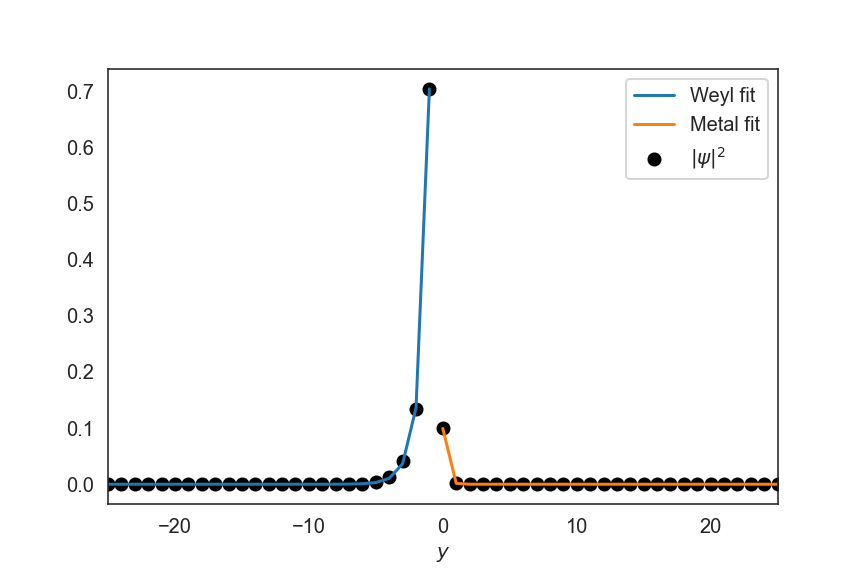

In [20]:
%matplotlib notebook

plt.figure()

# plt.plot(xdata_w,ydata_w,c='k')
# plt.plot(xdata_m,ydata_m,c='k')
plt.scatter(np.linspace(-half_size,half_size,size,endpoint=False),wvfct,c='k',label=r"$|\psi|^2$")

plt.plot(xdata_w,WeylDecay(xdata_w,A_w,B_w,Esurf),label="Weyl fit")
plt.plot(xdata_m,MetalDecay(xdata_m,C_m,Esurf),label="Metal fit")

plt.xlabel(r"$y$")

plt.xlim(-25,25)

plt.legend()

plt.show()

Continuum theory matches numerics with the help of 3 fit parameters (the amplitudes of each decay term).

In [26]:
# should equal 1
# but continuum has no reason to match with numerics, really
C_m**2 / (wm(Esurf)**2 + 1) * 1 / (2 * mu_p(Esurf)) + A_w**2 / (w_pm(+1,Esurf)**2 + 1) * 1 / (2 * lambda_pm(+1,Esurf)) + B_w**2  / (w_pm(-1,Esurf)**2 + 1) * 1 / (2 * lambda_pm(-1,Esurf)) + 2 * A_w * B_w / (np.sqrt(w_pm(+1,Esurf)**2 + 1) * np.sqrt(w_pm(-1,Esurf)**2 + 1)) * 1 / (lambda_pm(+1,Esurf) + lambda_pm(-1,Esurf))

0.24631069878120426

In [114]:
size = 30
mu = -8
g = 0
t = 1
ys = np.arange(size)

@interact(target=(-1,1,0.05),kx=(-1,1,0.1),kz=(-np.pi,np.pi,0.1),r=(0,3,0.1))
def PlotWavefunction(target=0,kx=0,kz=0,r=0,discrete=False,branch_pp=False,branch_pm=False,zoom=False,spin=True):
    # set up plot
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    
    # 1. spectrum 
    
    # full spectrum
    kxs_full, Es_full, locs = wg.Spectrum(size=size,res=res,krange=krange,kz=kz,t=1,g=g,mu=mu,r=r)
    
    # discrete surface theory
    if discrete:
        kxs_disc_pp, Es_disc_pp = ws.Energies(branch=+1,p_idx=+1,q_idx=+1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)
        kxs_disc_pm, Es_disc_pm = ws.Energies(branch=+1,p_idx=+1,q_idx=-1,krange=krange,kz=kz,t=t,g=g,mu=mu,r=r,adjusted=True)

    # add to plot
    ax[1].set_title("Full spectrum")
    ax[1].scatter(kxs_full[np.logical_not(locs)],Es_full[np.logical_not(locs)],c='k',marker='.',alpha=0.2, label="Numerics")
    ax[1].scatter(kxs_full[locs],Es_full[locs],c='r',marker='.',s=50,label="Interface numerics")
    if discrete:
        if branch_pp:
            ax[1].scatter(kxs_disc_pp,Es_disc_pp,c="blue",marker="+",s=12,alpha=0.2,label="Discrete ++")
        if branch_pm:
            ax[1].scatter(kxs_disc_pm,Es_disc_pm,c="orange",marker="+",s=12,alpha=0.2,label="Discrete +-")
    ax[1].set_xlim(-1,1)
    ax[1].set_ylim(-1,1)
    ax[1].set_xlabel(r"$k_x$")
    ax[1].set_ylabel(r"$E$")
    ax[1].legend(loc=(1.3,0.8)) 
    
    # add in a point to show where we are scanning
    ax[1].scatter(kx,target,s=250,alpha=0.35,c='orange')
    
    # 2. eigenstate of interest plotted in y
    
    # Hamiltonian again
    H = wg.FullHamiltonian(size=size,kx=kx,kz=kz,t=t,g=g,mu=mu,r=r)
    Es, Ws = np.linalg.eigh(H)
    idx = np.argmin(np.abs(Es - target))
    state = Ws[:,idx]
    prob = np.abs(state)**2
    wvfct = [np.sum(prob[i:i+2]) for i in range(0, np.size(prob), 2)]
    
    # plot it
    ax[0].set_title("$E={:.5}$".format(Es[idx]))
    ax[0].plot(ys,wvfct,c='r')
    ax[0].set_ylabel("$|\psi|^2$")
    ax[0].set_xlabel("$y$")
    ax[0].set_ylim(-1.01,1.01)
#     if zoom:
#         ax[0].set_xlim(,54)
    ax[0].axvline(14,c='pink',ls='--')
    
    # 3. spins
    if spin:
        sx,sy,sz=spins.SpinRealSpace(state,size)
        alphas = spins.Normalize(wvfct) # weight by probability
        rgba_colors_x = np.zeros((size,4))
        rgba_colors_z = np.zeros((size,4))
        # for red the first column needs to be one
        rgba_colors_x[:,0] = 1.0 # red
        rgba_colors_z[:,2] = 1.0 # blue
        # the fourth column needs to be your alphas
        rgba_colors_x[:, 3] = alphas
        rgba_colors_z[:, 3] = alphas
        # plot the spins
        ax[0].scatter(ys,sx,c=rgba_colors_x,label=r"$\sigma_x$")
        ax[0].scatter(ys,sz,c=rgba_colors_z,label=r"$\sigma_z$")    


interactive(children=(FloatSlider(value=0.0, description='target', max=1.0, min=-1.0, step=0.05), FloatSlider(…

In [79]:
kx1 = -0.5
kx2 = 0.

kz = np.pi / 2
r = 2.3
target1 = -0.75
target2 = 1
t = 1
size = 100
mu = -8
g = 0

# @interact(kx=(-np.pi,np.pi,0.1),kz=(-np.pi,np.pi,0.1),r=(0,3,0.1))
# def LocalizedWaves(kx=0,kz=0,r=1.3):
H = wg.FullHamiltonian(size=size,kx=kx1,kz=kz,t=t,g=g,mu=mu,r=r)
Es, Ws = np.linalg.eigh(H)
idx1 = np.argmin(np.abs(Es - target1))
state1 = Ws[:,idx1]
prob1 = np.abs(state1)**2
wvfct1 = [np.sum(prob1[i:i+2]) for i in range(0, np.size(prob1), 2)]

H = wg.FullHamiltonian(size=size,kx=kx2,kz=kz,t=t,g=g,mu=mu,r=r)
Es, Ws = np.linalg.eigh(H)
idx2 = np.argmin(np.abs(Es - target2))
state2 = Ws[:,idx2]
prob2 = np.abs(state2)**2
wvfct2 = [np.sum(prob2[i:i+2]) for i in range(0, np.size(prob2), 2)]

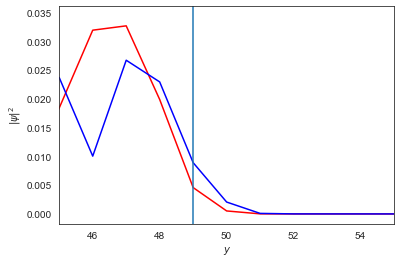

In [82]:
# plot it
plt.figure()
# plt.title("$E={:.5}$".format(Es[idx1]))
plt.plot(np.arange(size),wvfct1,c='r')
plt.plot(np.arange(size),wvfct2,c='b')
plt.ylabel("$|\psi|^2$")
plt.xlabel("$y$")
plt.xlim(45,55)
plt.axvline(49)
plt.show()

In [116]:
sx1,sy1,sz1=spins.SpinRealSpace(state1,size)
sx2,sy2,sz2=spins.SpinRealSpace(state2,size)

/Users/leogoutte/Desktop/Masters Research/Code and notebooks/weylsemimetal_tools/weyl_spins.py:293: RuntimeWarning: invalid value encountered in true_divide
  state_ = state[2*i:2*(i+1)] / np.sqrt(np.sum(np.abs(state[2*i:2*(i+1)])**2))


In [117]:
alphas1 = spins.Normalize(wvfct1) # weight by probability
alphas2 = wvfct2 # weight by probability
rgba_colors1 = np.zeros((size,4))
rgba_colors2 = np.zeros((size,4))
# for red the first column needs to be one
rgba_colors1[:,0] = 1.0
rgba_colors2[:,2] = 1.0
# the fourth column needs to be your alphas
rgba_colors1[:, 3] = alphas1
rgba_colors2[:, 3] = alphas2

(46.0, 52.0)

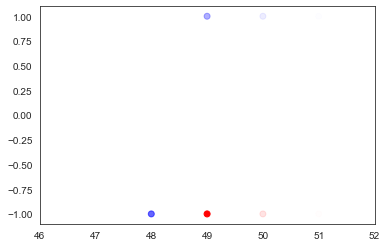

In [120]:
plt.scatter(np.arange(size),sx1,c=rgba_colors1)
plt.scatter(np.arange(size),sx2,c=rgba_colors2)

plt.xlim(46,52)
# plt.plot(np.arange(size),wvfct)